# Drawing 2D figures

In this lecture, we will make 2D figures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import matplotlib
# %matplotlib qt     
# Figures in a separate window
# %matplotlib inline          # Figures in this browser

### Read the temperature data
We are going to read two datasets: one for the mean temperature (absolute.nc) and the other one for the time series of temperature anomaly (HadCRUT.4.6.0.0.median.nc).

In [2]:
f = Dataset('absolute.nc', 'r')
print(f.variables.keys())
T = f.variables['tem'][:]    # monthly data
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
f.close()

odict_keys(['tem', 'lat', 'lon', 'time'])


In [3]:
f = Dataset('HadCRUT.4.6.0.0.median.nc', 'r')
print(f.variables.keys())
Tanom = f.variables['temperature_anomaly'][:]
time = f.variables['time'][:]
lon = f.variables['longitude'][:]
lat = f.variables['latitude'][:]
# print(f.variables['time'])
f.close()

odict_keys(['latitude', 'longitude', 'time', 'temperature_anomaly', 'field_status'])


The size of ```Tanom``` is

In [4]:
Tanom.shape

(2025, 36, 72)

## Plot temperature 2D plot
Let's make a plot of T in 1850

In [5]:
T1850 = T[0, :, :] + Tanom[0, :, :]    # This is the monthly mean 

### ```imshow```
The simplest way to visualize a 2D variable is ```imshow```. This function gives colors to each element of the array without considering grid information. It is fast and a good tool to check the variable.

In [6]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, *, data=None, **kwargs)
    Display an image, i.e. data on a 2D regular raster.
    
    Parameters
    ----------
    X : array-like or PIL image
        The image data. Supported array shapes are:
    
        - (M, N): an image with scalar data. The data is visualized
          using a colormap.
        - (M, N, 3): an image with RGB values (float or uint8).
        - (M, N, 4): an image with RGBA values (float or uint8), i.e.
          including transparency.
    
        The first two dimensions (M, N) define the rows and columns of
        the image.
    
        The RGB(A) values should be in the range [0 .. 1] for floats or
        [0 .. 255] for integers.  Out-of-range values will be clipped to
        these bounds.
    
   

As shown above, you do not pass grid information to ```imshow```.

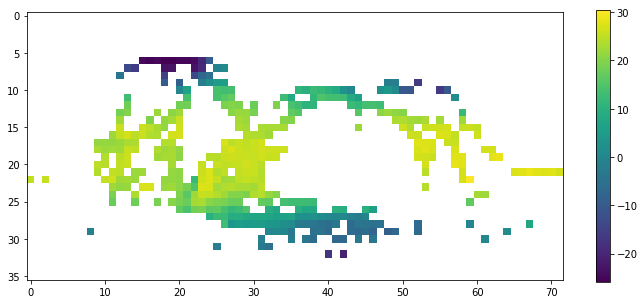

In [7]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))
c = ax.imshow(T1850)
plt.colorbar(c)

```imshow``` askes for a special argument if you want to modify the aspect ratio. 

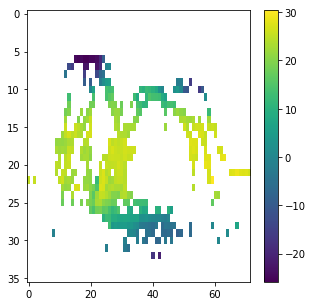

In [8]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
c = ax.imshow(T1850, aspect='auto')
plt.colorbar(c)

You can twick the figure with different colormap, origin, interpolation, vmin and vmax.

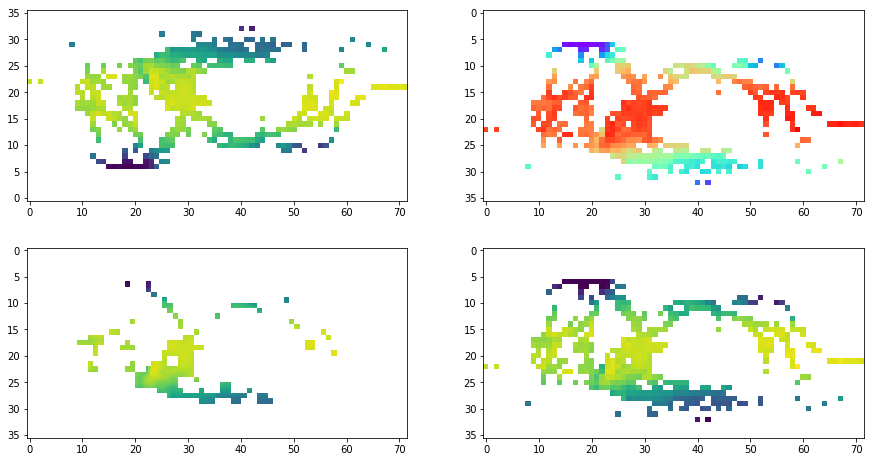

In [9]:
f, ax = plt.subplots(2, 2, figsize=(15, 8))
ax[0,0].imshow(T1850, origin='lower')
ax[0,1].imshow(T1850, cmap='rainbow')    # more at https://matplotlib.org/examples/color/colormaps_reference.html
ax[1,0].imshow(T1850, interpolation='bilinear')
ax[1,1].imshow(T1850, vmin=-20, vmax=30)

### pcolormesh
You can use ```pcolormesh``` in the same manner as ```imshow```, but you can also pass the grid information. 

In [10]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading='flat', antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolor([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. note::
    
       ``pcolormesh()`` is similar to :func:`~Axes.pcolor`. It's much
       faster and preferred in most cases. For a detailed discussion on
       the differences see
       :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : array_like
        A scalar 2-D array. The values will be color-mapped.
    
    X, Y : array_like, optional
        The coordinates of the quadrilateral corners. The quadrilateral
        for ``C[i,j]`` has corners at::
    
            (X[i+1, j], Y[i+1, j])   

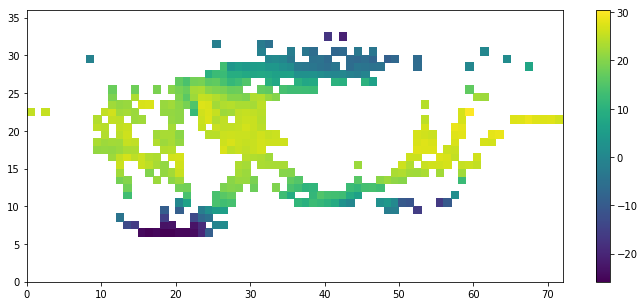

In [11]:
# Use pcolormesh as imshow
f, ax = plt.subplots(1, 1, figsize=(12, 5))
c = ax.pcolormesh(T1850)
plt.colorbar(c)

/Users/hajsong/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


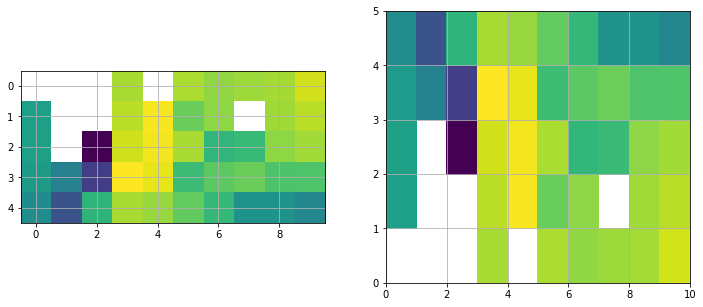

In [12]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(T1850[20:25, 20:30])
ax[0].grid('on')

ax[1].pcolormesh(T1850[20:25, 20:30])
ax[1].grid('on')

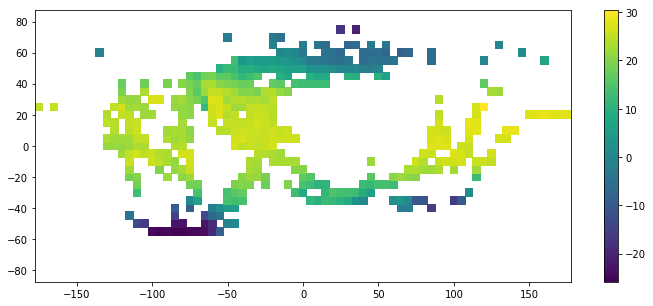

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))
c = ax.pcolormesh(lon, lat, T1850)
plt.colorbar(c)

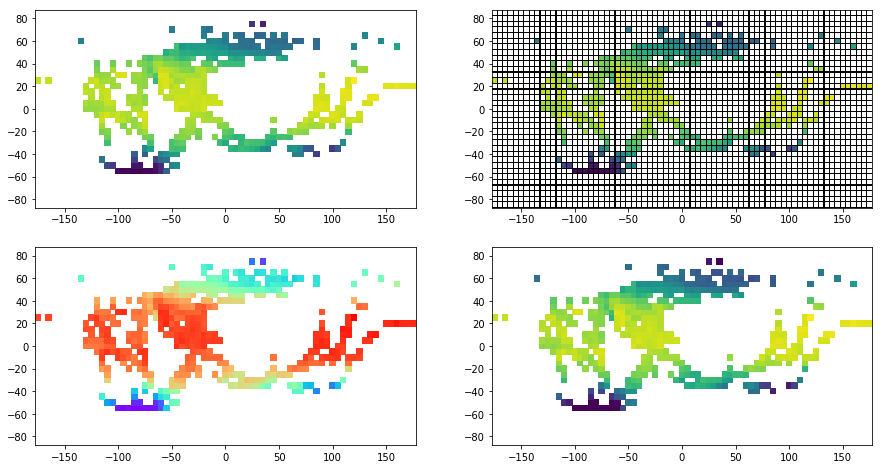

In [14]:
f, ax = plt.subplots(2, 2, figsize=(15, 8))
# pcolor() can be very slow for large arrays. 
# In most cases you should use the similar but much faster pcolormesh instead
ax[0,0].pcolor(lon, lat, T1850)
ax[0,1].pcolormesh(lon, lat, T1850, edgecolors='black', linewidth=.1)
ax[1,0].pcolormesh(lon, lat, T1850, cmap='rainbow')    # more at https://matplotlib.org/examples/color/colormaps_reference.html
ax[1,1].pcolormesh(lon, lat, T1850, vmin=-20, vmax=30)

### contour / contourf
```contour``` and ```contourf``` draw contour lines and filled contours, respectively. 
You can pass the grid information to these functions.

In [15]:
T2018 = T[0, :, :] + Tanom[2016, :, :]    # monthly mean T for 2018 January

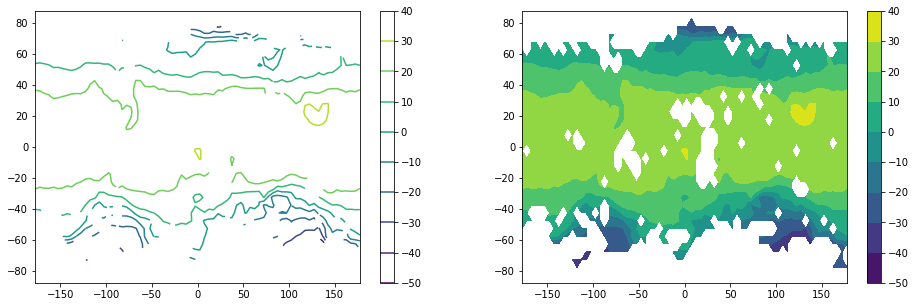

In [16]:
f, ax = plt.subplots(1, 2, figsize=(16, 5))
c0 = ax[0].contour(lon, lat, T2018)
plt.colorbar(c0, ax=ax[0])
c1 = ax[1].contourf(lon, lat, T2018)
plt.colorbar(c1, ax=ax[1])

You can decide how many contours to show in two different ways: a number of contours or an actual range

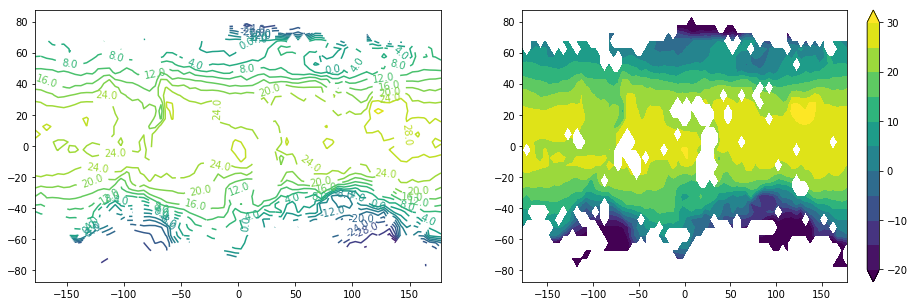

In [17]:
f, ax = plt.subplots(1, 2, figsize=(16, 5))
c0 = ax[0].contour(lon, lat, T2018, 20)
ax[0].clabel(c0, inline=1, fontsize=10, fmt='%2.1f')
c1 = ax[1].contourf(lon, lat, T2018, np.arange(-20, 31, 5), extend='both')
# ax[1].clabel(c1)
plt.colorbar(c1, ax=ax[1])

### Quiver
This is useful when you want to show the wind or ocean current.  
Let's read the wind data.

In [18]:
f = Dataset('uwnd.mon.mean.nc', 'r')
print(f.variables.keys())
uwind = f.variables['uwnd'][:]    # monthly data
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
f.close()
f = Dataset('vwnd.mon.mean.nc', 'r')
print(f.variables.keys())
vwind = f.variables['vwnd'][:]    # monthly data
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
f.close()

odict_keys(['lat', 'lon', 'time', 'uwnd'])
odict_keys(['lat', 'lon', 'time', 'vwnd'])


In [19]:
help(plt.quiver)

Help on function quiver in module matplotlib.pyplot:

quiver(*args, data=None, **kw)
    Plot a 2-D field of arrows.
    
    Call signatures::
    
      quiver(U, V, **kw)
      quiver(U, V, C, **kw)
      quiver(X, Y, U, V, **kw)
      quiver(X, Y, U, V, C, **kw)
    
    *U* and *V* are the arrow data, *X* and *Y* set the location of the
    arrows, and *C* sets the color of the arrows. These arguments may be 1-D or
    2-D arrays or sequences.
    
    If *X* and *Y* are absent, they will be generated as a uniform grid.
    If *U* and *V* are 2-D arrays and *X* and *Y* are 1-D, and if ``len(X)`` and
    ``len(Y)`` match the column and row dimensions of *U*, then *X* and *Y* will be
    expanded with :func:`numpy.meshgrid`.
    
    The default settings auto-scales the length of the arrows to a reasonable size.
    To change this behavior see the *scale* and *scale_units* kwargs.
    
    The defaults give a slightly swept-back arrow; to make the head a
    triangle, make *headaxis

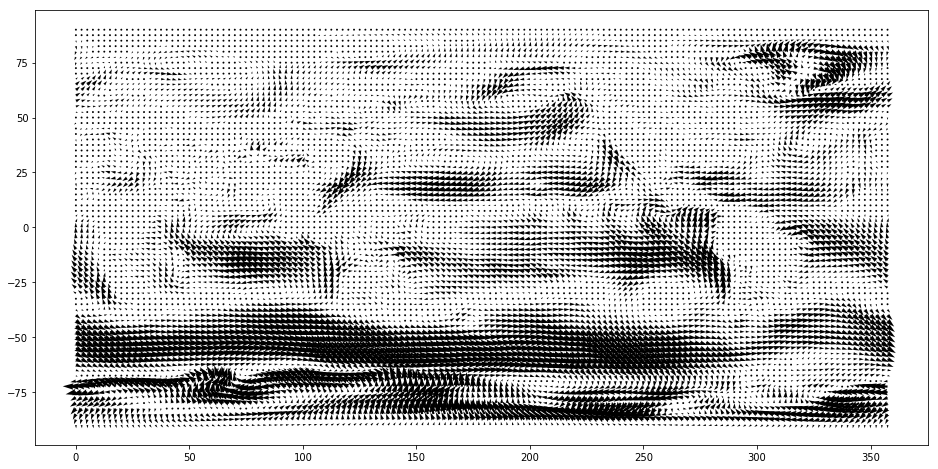

In [20]:
f, ax = plt.subplots(1, 1, figsize=(16, 8))
q = ax.quiver(lon, lat, uwind[-1,...], vwind[-1,...])

Although we have the plot with arrows, it is not easy to see their sizes and direction.  
It seems that there needs some tunings.

In [21]:
help(plt.quiverkey)

Help on function quiverkey in module matplotlib.pyplot:

quiverkey(Q, X, Y, U, label, **kw)
    Add a key to a quiver plot.
    
    Call signature::
    
      quiverkey(Q, X, Y, U, label, **kw)
    
    Arguments:
    
      *Q*:
        The Quiver instance returned by a call to quiver.
    
      *X*, *Y*:
        The location of the key; additional explanation follows.
    
      *U*:
        The length of the key
    
      *label*:
        A string with the length and units of the key
    
    Keyword arguments:
    
      *angle* = 0
        The angle of the key arrow. Measured in degrees anti-clockwise from the
        x-axis.
    
      *coordinates* = [ 'axes' | 'figure' | 'data' | 'inches' ]
        Coordinate system and units for *X*, *Y*: 'axes' and 'figure' are
        normalized coordinate systems with 0,0 in the lower left and 1,1
        in the upper right; 'data' are the axes data coordinates (used for
        the locations of the vectors in the quiver plot itself); '

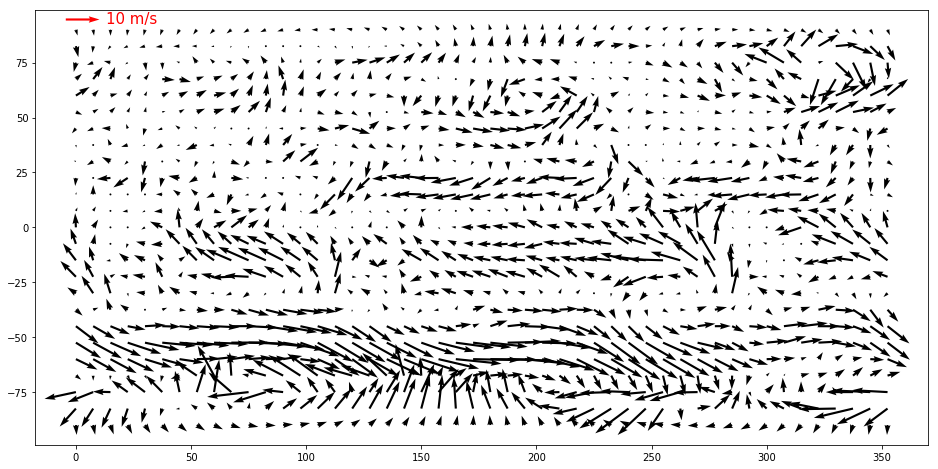

In [22]:
f, ax = plt.subplots(1, 1, figsize=(16, 8))
# Try to show arrows at every three points.
intv = 3
q = ax.quiver(lon[::intv], lat[::intv], uwind[-1, ::intv, ::intv], vwind[-1, ::intv, ::intv])
qk = ax.quiverkey(q, 10, 95, 10, '10 m/s', labelpos='E', coordinates='data', 
                  color='r', labelcolor='r', fontproperties={'size': 15})

AttributeError: can't set attribute

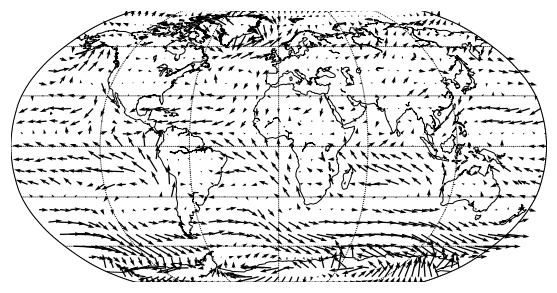

In [42]:
from mpl_toolkits.basemap import Basemap

X, Y =np.meshgrid(lon, lat)
plt.figure(figsize=(15,5))
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.quiver(X[::intv, ::intv], Y[::intv, ::intv], uwind[-1, ::intv, ::intv], vwind[-1, ::intv, ::intv], latlon=True)

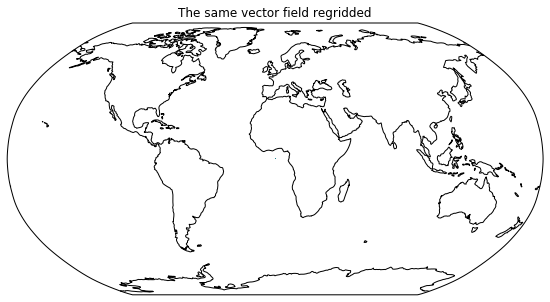

In [62]:
import cartopy.crs as ccrs

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_title('The same vector field regridded')
ax.set_extent([0, 360, -90, 90], ccrs.Robinson())
# ax.quiver(X[::intv, ::intv], Y[::intv, ::intv], uwind[-1, ::intv, ::intv], vwind[-1, ::intv, ::intv],
#          transform=ccrs.Robinson())
ax.contourf(X, Y, uwind[-1,...],
         transform=ccrs.Robinson())
ax.coastlines()
ax.set_global()